In [58]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset with low_memory=False to suppress DtypeWarning
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

In [3]:
# Filter out loan status entries
df = df.loc[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Fully Paid')]

In [4]:
# Display basic information about the filtered dataset
print("Shape of the filtered dataset:", df.shape)
print("\nColumn names and data types:")
print(df.dtypes)

Shape of the filtered dataset: (1345310, 151)

Column names and data types:
id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object


In [5]:
# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
print(df.head())


First few rows of the filtered dataset:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   
5  68426831        NaN    11950.0      11950.0          11950.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   
5     13.44       405.18     C        C3  ...                            NaN   

  h

In [6]:
# Summary statistics for numeric variables
numeric_vars = ['installment']
print("\nSummary statistics for numeric variables:")
print(df[numeric_vars].groupby(df['loan_status']).describe())


Summary statistics for numeric variables:
            installment                                                 \
                  count        mean         std    min     25%     50%   
loan_status                                                              
Charged Off    268559.0  465.147994  262.774106  21.62  275.29  402.83   
Fully Paid    1076751.0  431.323226  260.759563   4.93  240.92  368.26   

                              
                75%      max  
loan_status                   
Charged Off  605.31  1717.63  
Fully Paid   573.06  1719.83  


In [36]:
# Summary statistics for categorical variables
categorical_vars = ['verification_status', 'installment', 'emp_length', 'term', 'grade', 'sub_grade']
print("\nSummary statistics for categorical variables:")
for var in categorical_vars:
    print(df.groupby(['loan_status', var]).size().unstack())


Summary statistics for categorical variables:
verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                 59535           109232     99792
Fully Paid                 346166           412041    318544
installment  4.93     14.01    14.77    15.69    16.08    16.25    16.31    \
loan_status                                                                  
Charged Off      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Fully Paid       1.0      1.0      1.0      1.0      1.0      1.0      1.0   

installment  16.47    19.87    20.22    ...  1598.26  1607.80  1618.03  \
loan_status                             ...                              
Charged Off      NaN      NaN      NaN  ...      NaN      NaN      NaN   
Fully Paid       1.0      1.0      1.0  ...      1.0      3.0      2.0   

installment  1628.08  1647.03  1691.28  1714.54  1715.42  1717.63  1719.83  
loan_status           

In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                             0
member_id                1345310
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 151, dtype: int64


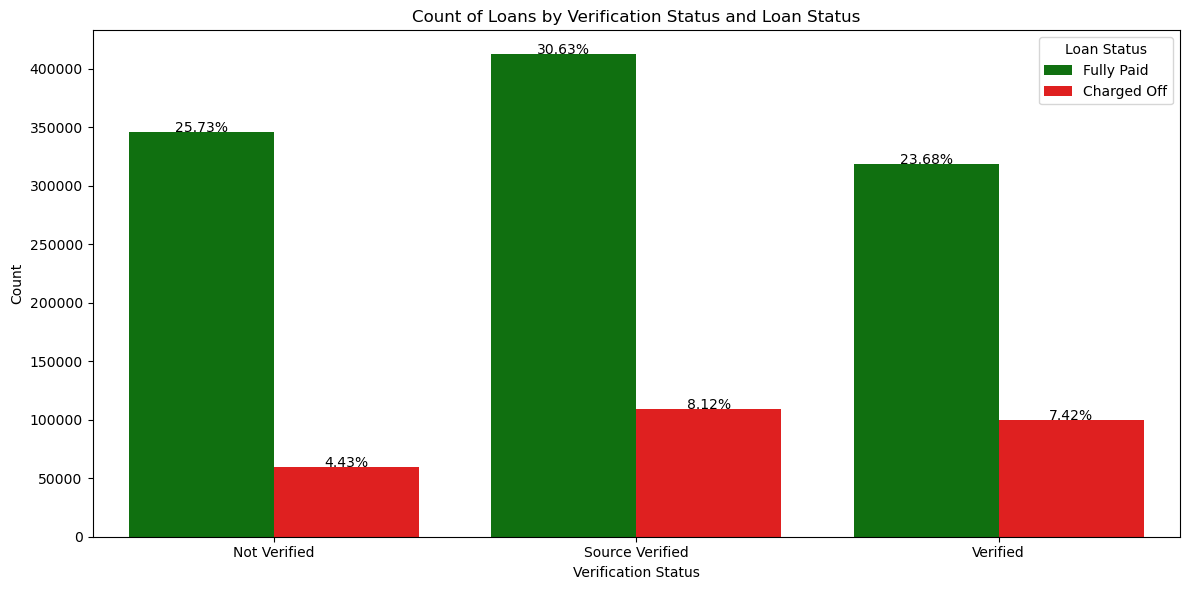

In [65]:
# Data visualization

# 1. Countplot of verification status by loan status
plt.figure(figsize=(12, 6))  
ax = sns.countplot(x='verification_status', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout() 
plt.show()

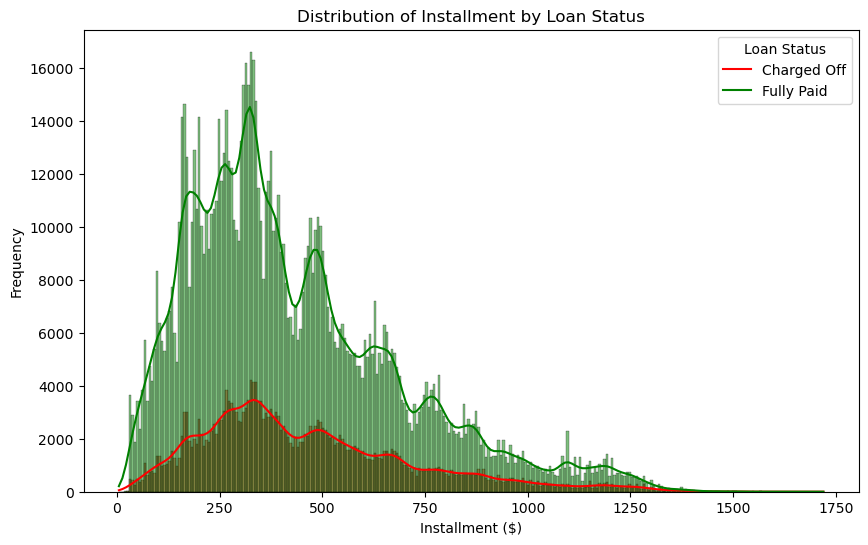

In [54]:
# 2. Distribution of installment by loan status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='installment', hue='loan_status', kde=True, palette={'Charged Off': 'red', 'Fully Paid': 'green'}, legend=True)
plt.title('Distribution of Installment by Loan Status')
plt.xlabel('Installment ($)')
plt.ylabel('Frequency')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()

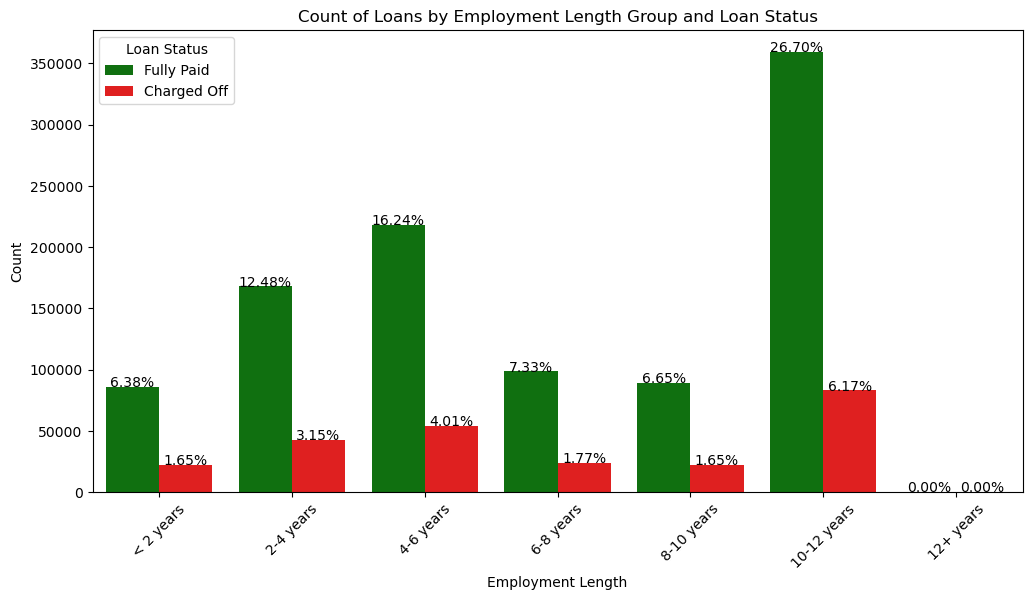

In [59]:
# 3. Countplot of employment length by loan status
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='emp_length_group', hue='loan_status', data=df,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Employment Length Group and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

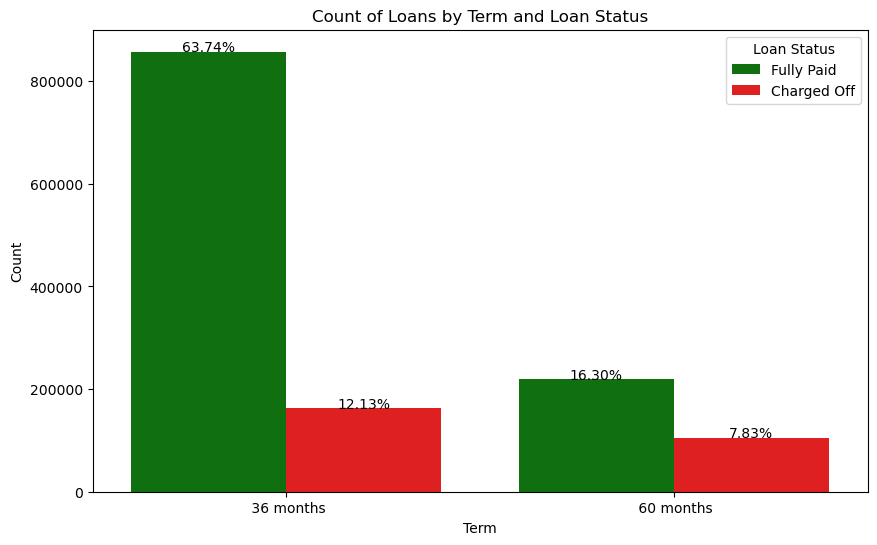

In [60]:
# 4. Countplot of loan term by loan status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='term', hue='loan_status', data=df,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'})

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

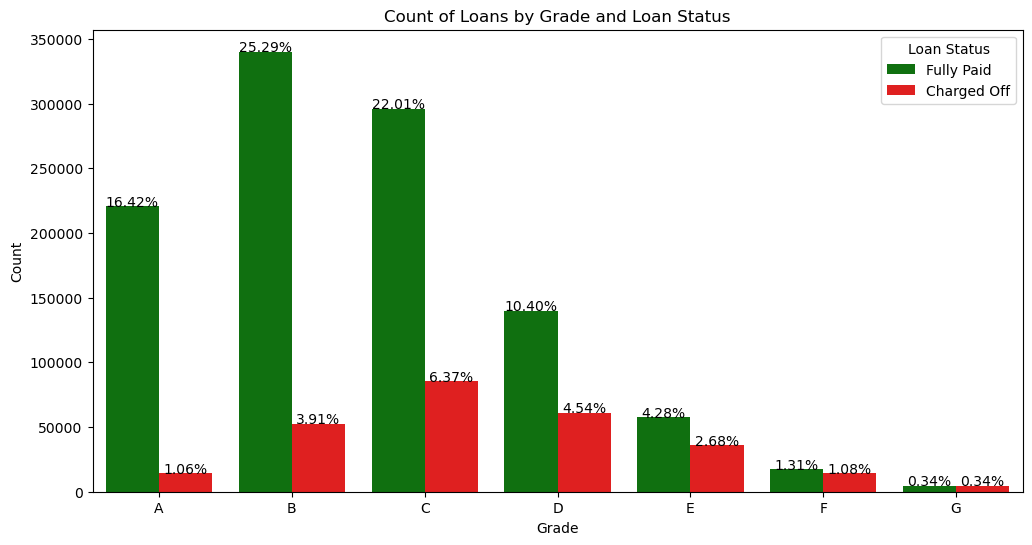

In [64]:
# 5. Countplot of loan grade by loan status
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='grade', hue='loan_status', data=df,
                   palette={'Charged Off': 'red', 'Fully Paid': 'green'},
                   order=sorted(df['grade'].unique()))

# Calculate percentage for each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):  # Check if height is NaN
        height = 0
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.title('Count of Loans by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

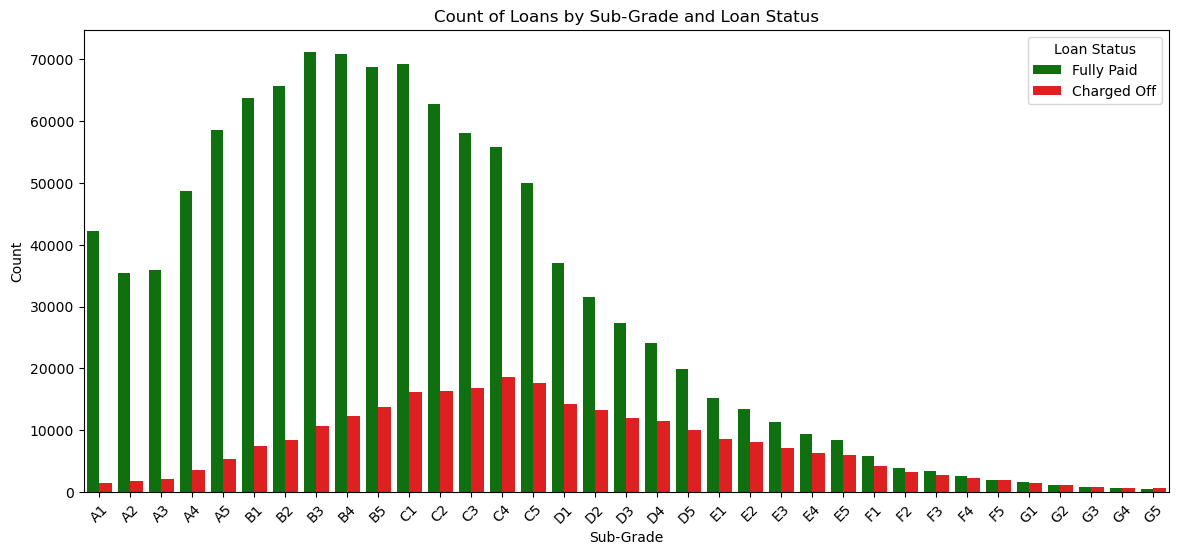

In [51]:
# 6. Countplot of loan sub-grade by loan status
plt.figure(figsize=(14, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=df,
              palette={'Charged Off': 'red', 'Fully Paid': 'green'},
              order=sorted(df['sub_grade'].unique()))
plt.title('Count of Loans by Sub-Grade and Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.show()